In [57]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
from grid_world import standard_grid, negative_grid
from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = .01
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')
result_array = np.array([])
# this is deterministic
# all p(s',r|s,a) = 1 or 0

if __name__ == '__main__':
  # this grid gives you a reward of -0.1 for every non-terminal state
  # we want to see if this will encourage finding a shorter path to the goal
  grid = negative_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # we'll randomly choose an action and update as we learn
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)

  # initial policy
  print("initial policy:")
  print_policy(policy, grid)

  # initialize V(s)
  V = {}
  states = grid.all_states()
  for s in states:
    # V[s] = 0
    if s in grid.actions:
      V[s] = np.random.random()
    else:
      # terminal state
      V[s] = 0

  # repeat until convergence
  # V[s] = max[a]{ sum[s',r] { p(s',r|s,a)[r + gamma*V[s']] } }
  count = 0
  while True:
    count += 1
    biggest_change = 0
    for s in states:
      old_v = V[s]

      # V(s) only has value if it's not a terminal state
      if s in policy:
        new_v = float('-inf')
        for a in ALL_POSSIBLE_ACTIONS:
          grid.set_state(s)
          r = grid.move(a)
          v = r + GAMMA * V[grid.current_state()]
          if v > new_v:
            new_v = v
        V[s] = new_v
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))
        
        result_array = np.append(result_array, biggest_change)
    print(count,biggest_change)

    if biggest_change < SMALL_ENOUGH:
      break

  # find a policy that leads to optimal value function
  for s in policy.keys():
    best_a = None
    best_value = float('-inf')
    # loop through all possible actions to find the best current action
    for a in ALL_POSSIBLE_ACTIONS:
      grid.set_state(s)
      r = grid.move(a)
      v = r + GAMMA * V[grid.current_state()]
      if v > best_value:
        best_value = v
        best_a = a
    policy[s] = best_a

  # our goal here is to verify that we get the same answer as with policy iteration
  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|
initial policy:
---------------------------
  R  |  D  |  R  |     |
---------------------------
  R  |     |  U  |     |
---------------------------
  U  |  U  |  U  |  D  |
1 0.8745512956880981
2 0.008745512956880988
3 8.723750461495094e-05
values:
---------------------------
-0.10|-0.09| 1.00| 0.00|
---------------------------
-0.10| 0.00|-0.09| 0.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


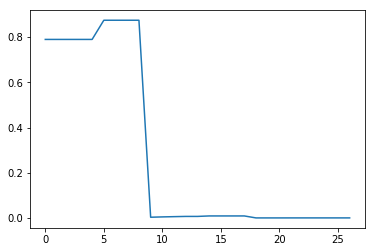

In [58]:
import matplotlib.pyplot as plt
plt.plot(result_array)
plt.show()

In [52]:
states

{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)}